In [162]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [163]:
train_data = pd.read_csv("train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [164]:
test_data = pd.read_csv("test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Exploratory Data Analysis

In [165]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Observações

891 linhas, 12 colunas <br><br>

1) checar para dados vazios ou não numéricos (isnull() e isna())<br>
- idade 177 nas <br>
- cabine 687 nas <br>
<br>

2) preencher os dados vazios (idade e cabine) <br>
- idade - preencher com média (semelhante a mediana)
- cabine - preenchidos com 0
- porto - preenchidos com ffill

### Tratamento de dados faltantes

In [166]:
train_data['Cabin'] = train_data['Cabin'].fillna(0)

In [167]:
selection = (train_data['Embarked'].isnull())
train_data = train_data[~selection]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [168]:
train_data.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [169]:
mean_age = train_data['Age'].mean().round(2)
mean_age

29.64

In [170]:
train_data['Age'] = train_data['Age'].fillna(mean_age)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [171]:
sns.set_theme(style="darkgrid")
sns.set_palette('coolwarm')

<Axes: xlabel='Pclass', ylabel='count'>

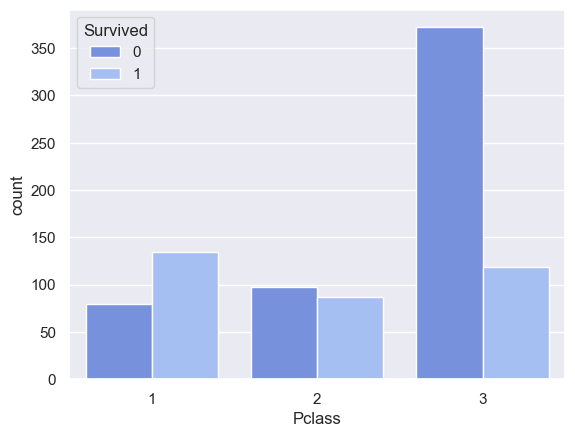

In [172]:
sns.countplot(data = train_data, x = "Pclass", hue = "Survived")

<Axes: xlabel='Survived', ylabel='count'>

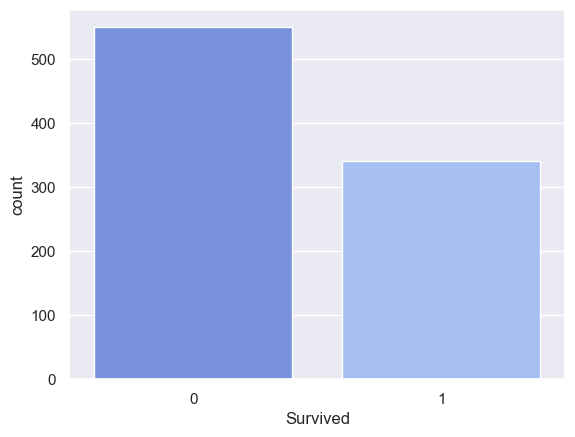

In [173]:
sns.countplot(data = train_data, x = "Survived")

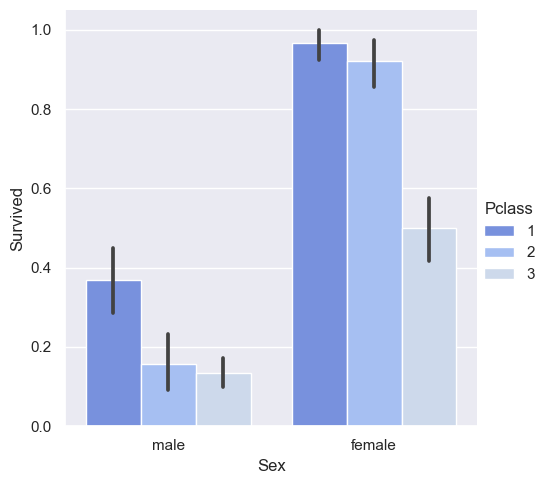

In [174]:
#catplot

ax = sns.catplot(data=train_data, x="Sex", y="Survived", hue="Pclass", kind = 'bar')
ax

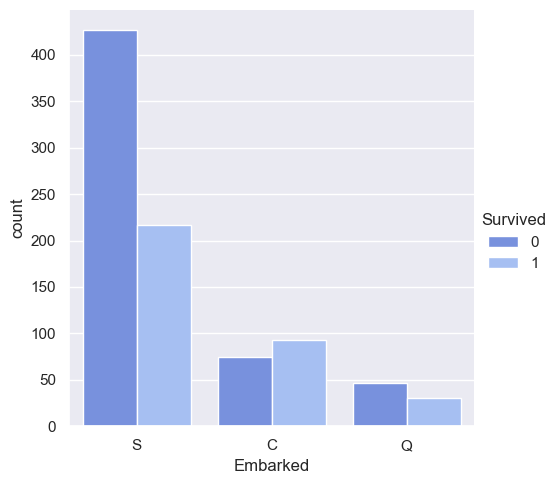

In [175]:
sns.catplot(data = train_data, x="Embarked", kind = "count", hue = "Survived")

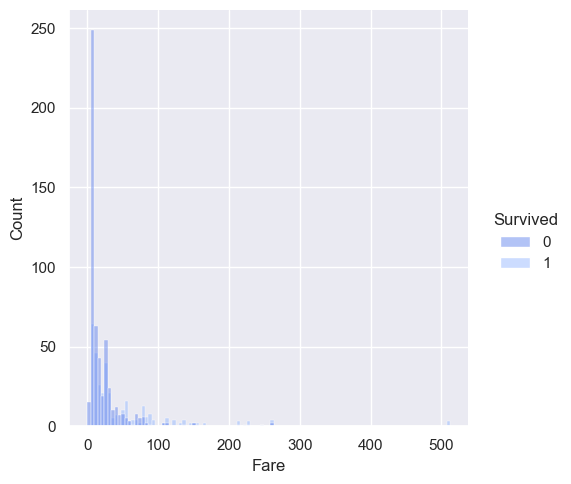

In [176]:
sns.displot(data = train_data, x="Fare", kind = "hist", hue = "Survived")

<Axes: >

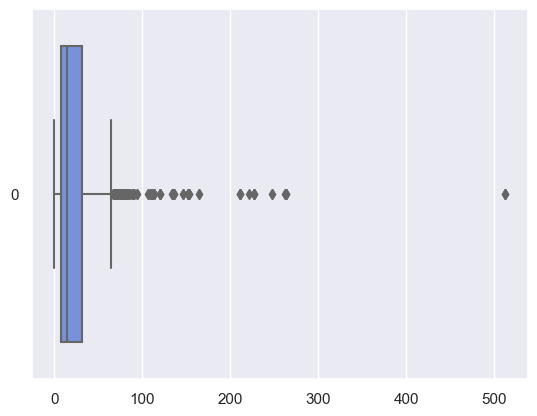

In [177]:
sns.boxplot(data = train_data['Fare'], orient='h')

In [178]:
new_data = train_data[['Survived', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]
new_data.head(10)

,Survived,Age,Pclass,SibSp,Parch,Fare
0,0,22.00,3,1,0,7.2500
1,1,38.00,1,1,0,71.2833
2,1,26.00,3,0,0,7.9250
3,1,35.00,1,1,0,53.1000
4,0,35.00,3,0,0,8.0500
5,0,29.64,3,0,0,8.4583
6,0,54.00,1,0,0,51.8625
7,0,2.00,3,3,1,21.0750
8,1,27.00,3,0,2,11.1333
9,1,14.00,2,1,0,30.0708


In [179]:
new_data.corr()

,Survived,Age,Pclass,SibSp,Parch,Fare
Survived,1.000000,-0.074507,-0.335549,-0.034040,0.083151,0.255290
Age,-0.074507,1.000000,-0.328267,-0.231909,-0.178005,0.088786
Pclass,-0.335549,-0.328267,1.000000,0.081656,0.016824,-0.548193
SibSp,-0.034040,-0.231909,0.081656,1.000000,0.414542,0.160887
Parch,0.083151,-0.178005,0.016824,0.414542,1.000000,0.217532
Fare,0.255290,0.088786,-0.548193,0.160887,0.217532,1.000000


## O que podemos concluir:

- Pessoas de classes mais elevadas tem maior chance de terem sobrevivido
- Mulheres tem mais chance de terem sobrevivido
- Crianças tem mais chance de terem sobrevivido

### Removendo outliers

In [ ]:
import matplotlib.pyplot as plt

#removing outliers (age)

age = train_data.Age

Q1 = age.quantile(.25)
Q3 = age.quantile(.75)
IIQ = Q3 - Q1
lower_limit = Q1 - 1.5*IIQ
upper_limit = Q3 + 1.5*IIQ

selection = (age >= lower_limit) & (age <= upper_limit)
new_train_data = train_data[selection]

ax = sns.boxplot(data=new_train_data.Age, orient='h')
ax

In [ ]:
#removing outliers (fare)

fare = train_data.Fare

Q1 = fare.quantile(.25)
Q3 = fare.quantile(.75)
IIQ = Q3 - Q1
lower_limit = Q1 - 1.5*IIQ
upper_limit = Q3 + 1.5*IIQ

selection = (fare >= lower_limit) & (fare <= upper_limit)
new_train_data = new_train_data[selection]

ax = sns.boxplot(data=new_train_data.Fare, orient='h')
ax

In [ ]:
new_train_data.info()

In [ ]:
new_train_data.head(10)

In [ ]:
new_train_data = new_train_data.drop(['Name', 'Ticket'], axis = 1)
new_train_data.head(10)

### Balanceando os dados

In [ ]:
features = new_train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X = pd.get_dummies(features, dtype=float)
y = new_train_data['Survived']

In [ ]:
X.head(10)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 301
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, stratify=y)
print("Training with %d elements and testing with %d elements." % (len(train_x), len(test_x)))

In [ ]:
from sklearn.preprocessing import StandardScaler
SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
scaler.fit(train_x)
train_x2 = scaler.transform(train_x)
test_x2 = scaler.transform(test_x)

model = SVC()
model.fit(train_x2, train_y)
predictions = model.predict(test_x2)

accuracy = accuracy_score(test_y, predictions) * 100
print("SVC accuracy was %.2f%%" % accuracy)

In [ ]:
#dummy classifier

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
accuracy = dummy_stratified.score(test_x, test_y) * 100

print("Dummy classifier accuracy was %.2f%%" % accuracy)

In [ ]:
#decision tree classifier

from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=5)
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("Decision Tree Classifier accuracy: %.2f%%" % accuracy)

In [ ]:
#random forest

from sklearn.ensemble import RandomForestClassifier

SEED = 301
np.random.seed(SEED)
model = RandomForestClassifier(max_depth=5)
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("Random Forest Classifier accuracy: %.2f%%" % accuracy)

In [ ]:
#cross validate - decision tree

from sklearn.model_selection import cross_validate

SEED = 301
np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=5)
results = cross_validate(model, X, y, cv = 5, return_train_score= False)
mean = results['test_score'].mean()
std_dev = results['test_score'].std()
print("Accuracy with cross validation, 5 = [%.2f, %.2f]" % ((mean - 2 * std_dev) * 100, (mean + 2 * std_dev) * 100))

In [ ]:
#cross validate - SVC

SEED = 301
np.random.seed(SEED)
model = SVC()
results = cross_validate(model, X, y, cv = 5, return_train_score= False)
mean = results['test_score'].mean()
std_dev = results['test_score'].std()
print("Accuracy with cross validation, 5 = [%.2f, %.2f]" % ((mean - 2 * std_dev) * 100, (mean + 2 * std_dev) * 100))

In [ ]:
#cross validate - random forest

SEED = 301
np.random.seed(SEED)
model = RandomForestClassifier(max_depth=5)
results = cross_validate(model, X, y, cv = 5, return_train_score= False)
mean = results['test_score'].mean()
std_dev = results['test_score'].std()
print("Accuracy with cross validation, 5 = [%.2f, %.2f]" % ((mean - 2 * std_dev) * 100, (mean + 2 * std_dev) * 100))

In [ ]:
test_data.info()

In [ ]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(method = 'ffill')

In [ ]:
test_data.head()

In [ ]:
#model

features_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X_test = pd.get_dummies(features_test)

model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
    